BIBLIOTECAS

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.optimizers import adam
from keras.optimizers import adamax

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


CARREGAMENTO DOS DATASETS

In [14]:
carregando_clear = np.load('C:\\Users\\Flavia Papelaria\\Desktop\\Dados Capturados\\Clear.npy', mmap_mode='r')
carregando_wifi = np.load('C:\\Users\\Flavia Papelaria\\Desktop\\Dados Capturados\\WIFI_1M.npy', mmap_mode='r')
carregando_lte1m = np.load('C:\\Users\\Flavia Papelaria\\Desktop\\Dados Capturados\\LTE_1M.npy', mmap_mode='r')

REDUÇÃO DO DATASET

In [15]:
dados_clear = carregando_clear[:1000000]
dados_wifi = carregando_wifi[:1000000]
dados_lte = carregando_lte1m[:1000000]

SEPARACAO DAS PARTES REAL E IMAGINARIA

In [16]:
def sep_col_comp(dados):
    parte_real = dados.real
    parte_imag = dados.imag
    return parte_real , parte_imag

def montagem_datasets(dados_1 , dados_2, dados_3):
    real1 , imag1 = sep_col_comp(dados_1)
    real2 , imag2 = sep_col_comp(dados_2)
    real3 , imag3 = sep_col_comp(dados_3)
    atrib1 = np.zeros(len(dados_1))
    atrib2 = np.ones(len(dados_2))
    atrib3 = np.ones(len(dados_3))*2
    dados1 = np.column_stack((real1,imag1,atrib1))
    dados2 = np.column_stack((real2,imag2,atrib2))
    dados3 = np.column_stack((real3,imag3,atrib3))
    conjunto = np.vstack([dados1 , dados2 , dados3])
    indices = np.random.permutation(len(conjunto))
    dados = conjunto[indices]
    return dados

def remodel(dados , feature):
    df = pd.DataFrame(dados , columns = ['real' , 'imag' , 'clfq'])
    df_junt = df[['real' , 'imag']].to_numpy()
    dados_dim = df_junt
    dados_dim = dados_dim.astype(np.float32)
    alvo = df['clfq'].values
    alvo_dim = alvo
    alvo_dim = alvo_dim.astype(np.float32)
    
    return dados_dim , alvo_dim

def processos(dados_1 , dados_2, dados_3, feature):
    dados = montagem_datasets(dados_1 , dados_2, dados_3)
    X , Y = remodel(dados , feature)
    return X , Y

CLEAR X WIFI X LTE

In [17]:
X,Y = processos(dados_clear, dados_lte , dados_wifi , 3)
print(X)
print(Y)

[[-1.5259311e-04  3.0518622e-05]
 [-1.3123008e-03 -7.9348416e-04]
 [-1.2207449e-04  3.6622345e-04]
 ...
 [-2.2278593e-03 -1.4954124e-03]
 [-3.6317161e-03 -3.6622345e-04]
 [-3.0518622e-05  6.1037244e-05]]
[0. 2. 1. ... 2. 0. 0.]


CONJUNTO DE TREINAMENTO E TESTE

In [18]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.8)

NORMALIZAÇÃO DOS DADOS

In [19]:
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)


TREINAMENTO DA REDE NEURAL

In [20]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(400,200,100,20), verbose= True , tol=0.000001,
                        max_iter = 100, activation = 'relu', shuffle=True, n_iter_no_change = 5,
                        solver = 'sgd', early_stopping=True, learning_rate= 'adaptive' 
                        )

mlp_clf.fit(trainX_scaled, Y_train)

Iteration 1, loss = 0.89578652
Validation score: 0.570183
Iteration 2, loss = 0.80334942
Validation score: 0.575400
Iteration 3, loss = 0.77968043
Validation score: 0.572667
Iteration 4, loss = 0.77038808
Validation score: 0.576083
Iteration 5, loss = 0.76508353
Validation score: 0.577817
Iteration 6, loss = 0.76144360
Validation score: 0.580733
Iteration 7, loss = 0.75891725
Validation score: 0.575850
Iteration 8, loss = 0.75715398
Validation score: 0.581583
Iteration 9, loss = 0.75585099
Validation score: 0.574417
Iteration 10, loss = 0.75501881
Validation score: 0.580317
Iteration 11, loss = 0.75436199
Validation score: 0.584167
Iteration 12, loss = 0.75397082
Validation score: 0.583633
Iteration 13, loss = 0.75360061
Validation score: 0.583767
Iteration 14, loss = 0.75318946
Validation score: 0.575483
Iteration 15, loss = 0.75297971
Validation score: 0.584100
Iteration 16, loss = 0.75264279
Validation score: 0.571900
Iteration 17, loss = 0.75249414
Validation score: 0.579700
Valida

MLPClassifier(early_stopping=True, hidden_layer_sizes=(400, 200, 100, 20),
              learning_rate='adaptive', max_iter=100, n_iter_no_change=5,
              solver='sgd', tol=1e-06, verbose=True)

ACURÁCIA

In [21]:
y_pred = mlp_clf.predict(testX_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.59


MATRIZ DE CONFUSÃO

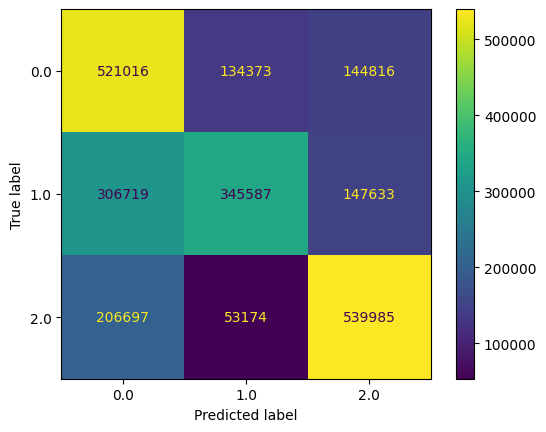

In [22]:
cm = confusion_matrix(Y_test, y_pred, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_clf.classes_)
disp.plot()

In [23]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.65      0.57    800205
         1.0       0.65      0.43      0.52    799939
         2.0       0.65      0.68      0.66    799856

    accuracy                           0.59   2400000
   macro avg       0.60      0.59      0.58   2400000
weighted avg       0.60      0.59      0.58   2400000



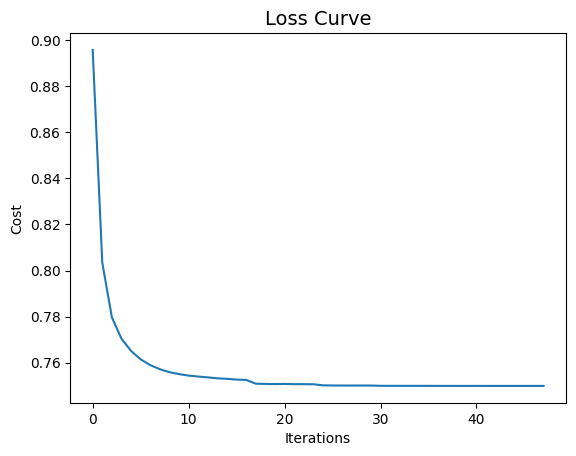

In [24]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp_clf, param_grid)
grid.fit(trainX_scaled, Y_train)

print(grid.best_params_) 

grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, grid_predictions)))